Train: X=(60000, 28, 28), y=(60000,)
 Test: X=(10000, 28, 28), y=(10000,)

(28, 28)
5


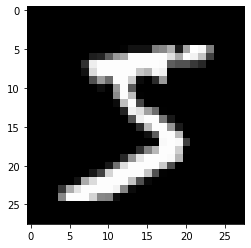

(28, 28)
0


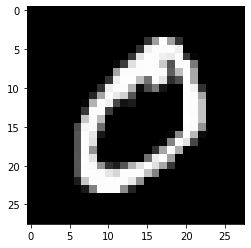

(28, 28)
4


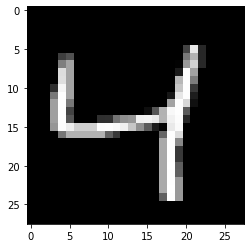

(28, 28)
1


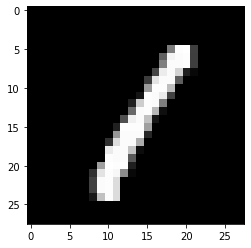

(28, 28)
9


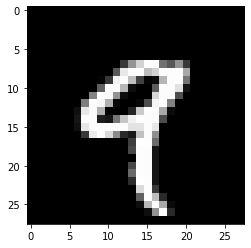

(28, 28)
2


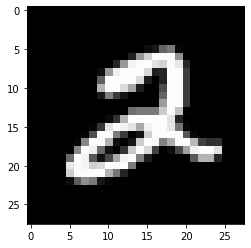

(28, 28)
1


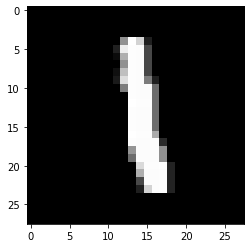

(28, 28)
3


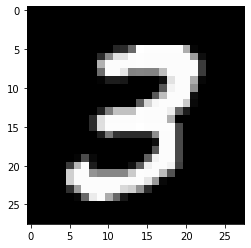

(28, 28)
1


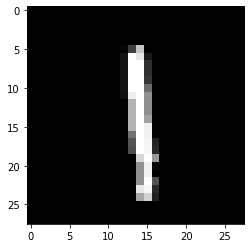

In [8]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print(' Test: X=%s, y=%s' % (testX.shape, testy.shape))
print('')
for i in range(9):
  #plt.subplot(330 + 1 + i)
  print(trainX[i].shape)
  print(trainy[i])
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  plt.show()

#plt.show()
#plt.clf()
#for i in range(9):
#  plt.subplot(330 + 1 + i)
#  plt.imshow(testX[i], cmap=plt.get_cmap('gray'))
#  print(testy[i])
#
#plt.show()

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


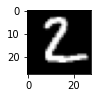

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2031 - accuracy: 0.9383 - val_loss: 0.0970 - val_accuracy: 0.9708
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0614 - val_accuracy: 0.9829
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0599 - val_accuracy: 0.9824
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0520 - val_accuracy: 0.9851
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0510 - val_accuracy: 0.9846
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.0497 - val_accuracy: 0.9868
Epoch 7/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0484 - v

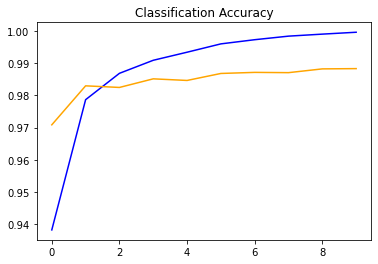

Test Set > 98.780


In [9]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

DEBUGVIS = True

(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

if DEBUGVIS:
  print(testY[1])
  plt.subplot(330 + 1)
  plt.imshow(testX[1], cmap=plt.get_cmap('gray'))#
  plt.show()

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', \
                   kernel_initializer='he_uniform', \
                   input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', \
                  kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', \
                metrics=['accuracy'])

if DEBUGVIS:
  filename = 'keras_model_plot.png'
  plot_model(model, \
           to_file=filename,
           show_shapes=True,
           show_layer_names=True)

trainX, validX, trainY, validY = train_test_split(trainX, trainY, \
                                                  test_size=0.20, random_state=42)

history = model.fit(trainX, trainY, epochs=10, \
            batch_size=32, validation_data=(validX, validY), verbose=1)
_, acc = model.evaluate(validX, validY, verbose=0)
print('Validation Set > %.3f' % (acc * 100.0))
_, acc = model.evaluate(trainX, trainY, verbose=0)
print('Training Set > %.3f' % (acc * 100.0))

plt.clf()
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

model.save('final_model.h5')
_, acc = model.evaluate(testX, testY, verbose=0)
print('Test Set > %.3f' % (acc * 100.0))
model.save('final_model.h5')